In [318]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.features.map_dataset import MapDataset
from src.visualization.mapper import *

from shapely.geometry import Polygon, MultiPoint, Point, MultiPolygon
plt.rcParams.update({'font.size': 16})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
# Build all pollution data
mapper = Mapper()
# this fuction concatenate all station data into a single file and save 
mapper.build_station_info()

number of stations = (2728, 30)
Countries ['Thailand' 'India' 'China' 'Indonesia' 'Malaysia' 'Bangladesh' 'Vietnam'
 'Myanmar' 'Brunei Darussalam' 'Cambodia' 'Bhutan' 'Laos']


In [263]:
# Compiling all pollution data 
mapper.build_pollution_all()

no data file for station o24 in folder C:/Users/Benny/Documents/Fern/aqi_thailand2/data/aqm_hourly2/
no data file for station o24 in folder C:/Users/Benny/Documents/Fern/aqi_thailand2/data/aqm_hourly3/
no data file for station o21 in folder C:/Users/Benny/Documents/Fern/aqi_thailand2/data/aqm_hourly2/
no data file for station o21 in folder C:/Users/Benny/Documents/Fern/aqi_thailand2/data/aqm_hourly3/
no data file for station o23 in folder C:/Users/Benny/Documents/Fern/aqi_thailand2/data/aqm_hourly2/
no data file for station o23 in folder C:/Users/Benny/Documents/Fern/aqi_thailand2/data/aqm_hourly3/
no data file for station 87t in folder C:/Users/Benny/Documents/Fern/aqi_thailand2/data/aqm_hourly2/
no data file for station 87t in folder C:/Users/Benny/Documents/Fern/aqi_thailand2/data/aqm_hourly3/
no data file for station 88t in folder C:/Users/Benny/Documents/Fern/aqi_thailand2/data/aqm_hourly2/
no data file for station 88t in folder C:/Users/Benny/Documents/Fern/aqi_thailand2/data/aqm

87it [00:06, 13.18it/s]


pcd data shape (6915813, 8)


9it [00:00, 79.84it/s]

data_columns Index(['datetime', 'PM2.5', 'PM10', 'O3', 'CO', 'NO2', 'SO2', 'stationid'], dtype='object')


404it [00:04, 85.86it/s]


cmu data shape (2430866, 8)


74it [00:02, 28.97it/s]


bkp data shape (1562277, 8)


433it [00:08, 52.86it/s]


Berkeley data shape (2368713, 8)


6it [00:31,  5.18s/it]


US Embassy data shape (226155, 8)


# MapDataset

This object allows easily visualization of the data by country.

In [255]:
mdataset = MapDataset('Thailand')
mdataset.load_()

In [277]:
# build or load pollution by province and add as .poll attribute
mdataset.load_poll_prov(pollutant='PM2.5')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77/77 [22:56<00:00, 17.88s/it]


In [301]:
# calculate the yearly average only during the winter season
#poll attributes 
poll = mdataset.poll
poll = add_season(poll, start_month='-10-01', end_month='-04-30')
# keep only winter season 
poll = poll[poll['season'] != 'other']
# calculate mean by province 
mean_poll = pd.DataFrame(poll.mean(axis=0))
mean_poll.columns = ['PM2.5']

In [302]:
mean_poll.sort_values('PM2.5', ascending=False).head()

,PM2.5
year,2013.085775
Buri Ram,56.989312
Sukhothai,50.842950
Saraburi,42.873442
Nong Bua Lam Phu,41.021575


In [303]:
# create a map of pollution by merging with the shape file 
plot_map = mdataset.prov_map.merge(mean_poll, left_on='province', right_index=True, how='left')

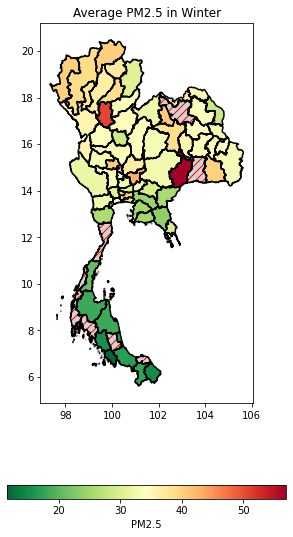

In [305]:
_, ax = plt.subplots(1, 1, figsize=(5,10))
plot_map.plot(column='PM2.5',
           ax=ax,legend=True,
           legend_kwds={'label': "PM2.5",
                       'orientation': "horizontal"},  cmap='RdYlGn_r',
             missing_kwds={
         "color": "lightgrey",
         "edgecolor": "red",
            "hatch": "///",
           "label": "Missing values" },)

 
plot_map.boundary.plot(ax=ax, color='black')

ax.set_title("Average PM2.5 in Winter")
plt.savefig(mdataset.report_folder + 'avg_pm25_map.png')

In [308]:
# select province based on average income level
# load income data by province 
income = pd.read_csv(mdataset.health_folder + 'income_prov/income_98_19.csv')
income = income.drop('thaiprov', axis=1).set_index('province')
income.columns = income.columns.astype(int)
income.head()

,1998,2000,2002,2004,2006,2007,2009,2011,2013,2015,2017,2019
province,,,,,,,,,,,,
Whole Kingdom,12492.0,12150.0,13736.0,14963.0,17787.0,18660.0,20904.0,23235.9,25194.0,26914.846584,26946.43,26018.42
Greater Bangkok,24929.0,25242.0,28239.0,28135.0,33088.0,35007.0,37732.0,41630.6,43058.0,41002.390519,NaN,NaN
Bangkok,26054.0,26909.0,29589.0,29843.0,36658.0,39020.0,42380.0,48951.0,49190.8,45571.700000,45707.31,39459.36
Samut Prakan,18100.0,15745.0,19680.0,19946.0,20382.0,21302.0,23359.0,23797.9,29575.3,25457.200000,28711.77,24729.42
Nonthaburi,24211.0,24566.0,29119.0,26658.0,31152.0,32743.0,34626.0,35119.7,30663.6,36884.000000,40860.88,37502.22


In [309]:
# select province based on average income level
avg_income = income.mean(axis=1).astype(int).sort_values()
cm_income = avg_income.loc['Chiang Mai']
near_income = avg_income[(avg_income < cm_income +1000) & (avg_income > cm_income - 2000) ]
near_income = near_income.drop(['Northeastern Region', 'Northern Region'])

In [311]:
near_income.index.to_list()

['Tak',
 'Narathiwat',
 'Nan',
 'Surin',
 'Sakon Nakhon',
 'Nong Bua Lam Phu',
 'Roi Et',
 'Amnat Charoen',
 'Chaiyaphum',
 'Chiang Mai',
 'Pattani',
 'Uthai Thani',
 'Loei',
 'Phrae',
 'Phetchabun',
 'Mukdahan',
 'Nong Khai',
 'Yala',
 'Uttaradit',
 'Suphan Buri']

In [312]:
near_income_list = ['Tak',
 'Narathiwat',
 'Nan',
 'Surin',
 'Sakon Nakhon',
 'Nong Bua Lam Phu',
 'Roi Et',
 'Amnat Charoen',
 'Chaiyaphum',
 'Chiang Mai',
 'Pattani',
 'Uthai Thani',
 'Loei',
 'Phrae',
 'Phetchabun',
 'Mukdahan',
 'Nong Khai',
 'Yala',
 'Uttaradit',
 'Suphan Buri']

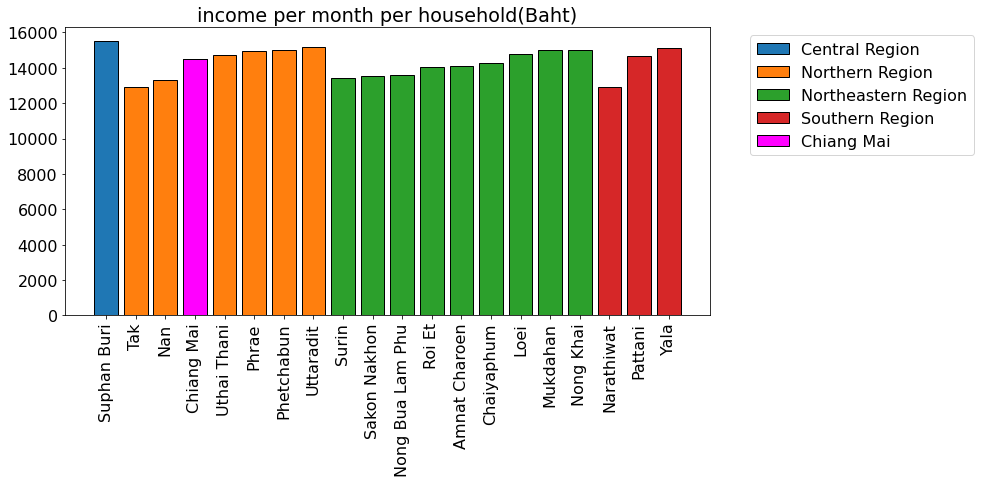

In [323]:
fig, ax = plt.subplots(1,1, figsize=(14, 7))

province_list = []
for region in provinces['region'].unique():
    # select province
    prov_in_region = provinces[provinces['region'] == region]['province'].to_list()
    df = near_income[near_income.index.isin(prov_in_region)]
    province_list += df.index.to_list()
    if len(df) > 0:
        ax.bar(df.index, df, label=region, edgecolor='black')
 
df = near_income.loc[['Chiang Mai']]
ax.bar(df.index, df, color='magenta', label='Chiang Mai', edgecolor='black')

ax.legend(bbox_to_anchor=(1.05, 1.0))
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

#ax.set_xlabel('province')
ax.set_title('income per month per household(Baht)')
plt.tight_layout()
plt.savefig(mdataset.report_folder + 'income.png', dpi=300)